# Comparing LDA Models 40 vs 90 topics
- Richard Kuzma, 8SEP2020

## Load LDA models

In [1]:
### Imports

# basic
from pprint import pprint
import pickle
import time

# data science
import pandas as pd

# NLP
import gensim
from gensim.models import CoherenceModel, LdaModel

# plotting
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
### save best perplexity model (8 topics)
path = '/Users/richardkuzma/coding/analysis/monster/models/'

filename = 'monster_jobs_LDA_40_topics_cv_zero476.pkl'
with open(path+filename, 'rb') as f:
    LDA_40 = pickle.load(f)
    
filename = 'monster_jobs_LDA_90_topics_cv_zero461.pkl'
with open(path+filename, 'rb') as f:
    LDA_90 = pickle.load(f)


In [3]:
def visualize_lda(model, corpus, dictionary):
    """returns the pyLDAvis PreparedData given model, corpus, dictionary"""
    """Could pickle this to save it"""
    """pyLDAvis.save_html(vis, "filename") also works to export in html"""
    pyLDAvis.enable_notebook()
    t0 = time.time()
    vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    print('{} seconds'.format(time.time()-t0))
    return vis

def print_lda_topics(lda_model):
    pprint(lda_model.print_topics())

## Compare topic lists

In [4]:
LDA_40.print_topics(40)

[(0,
  '0.041*"customer" + 0.020*"ability" + 0.017*"company" + 0.014*"safety" + 0.014*"equipment" + 0.013*"perform" + 0.013*"product" + 0.012*"vehicle" + 0.011*"education" + 0.011*"duty"'),
 (1,
  '0.043*"support" + 0.028*"system" + 0.027*"network" + 0.020*"technical" + 0.016*"customer" + 0.015*"issue" + 0.013*"security" + 0.013*"troubleshoot" + 0.013*"software" + 0.012*"knowledge"'),
 (2,
  '0.088*"training" + 0.027*"golden_corral" + 0.025*"benefit" + 0.017*"engineering" + 0.014*"variety" + 0.012*"tree" + 0.011*"construction" + 0.011*"material" + 0.010*"must" + 0.010*"religion_creed_sex_sexual"'),
 (3,
  '0.079*"project" + 0.036*"construction" + 0.015*"schedule" + 0.014*"manager" + 0.011*"site" + 0.010*"management" + 0.010*"engineering" + 0.009*"estimate" + 0.009*"commercial" + 0.009*"design"'),
 (4,
  '0.041*"quality" + 0.020*"safety" + 0.015*"process" + 0.014*"product" + 0.013*"manufacturing" + 0.012*"company" + 0.012*"program" + 0.011*"production" + 0.010*"ensure" + 0.007*"manageme

In [5]:
LDA_90.print_topics(90)


[(0,
  '0.035*"customer" + 0.022*"business" + 0.020*"new" + 0.015*"sale" + 0.015*"ability" + 0.013*"level" + 0.012*"mop" + 0.011*"manager" + 0.011*"custodial" + 0.010*"branch"'),
 (1,
  '0.022*"duty" + 0.020*"ability" + 0.017*"procedure" + 0.016*"follow" + 0.015*"assign" + 0.014*"maintain" + 0.013*"perform" + 0.013*"policy" + 0.011*"maintains" + 0.011*"equipment"'),
 (2,
  '0.036*"product" + 0.017*"development" + 0.015*"design" + 0.013*"technical" + 0.013*"process" + 0.010*"ability" + 0.009*"project" + 0.008*"customer" + 0.008*"business" + 0.008*"engineering"'),
 (3,
  '0.025*"industry" + 0.023*"quality" + 0.023*"ability" + 0.021*"utensil" + 0.020*"cook" + 0.020*"length" + 0.016*"involves_repetitive_motion" + 0.016*"steam_risk_conditions" + 0.016*"follow" + 0.016*"must"'),
 (4,
  '0.049*"ohio" + 0.048*"oh" + 0.030*"control" + 0.026*"layout" + 0.023*"indiana" + 0.020*"mi" + 0.020*"de" + 0.019*"logic" + 0.019*"must" + 0.017*"forward_resume"'),
 (5,
  '0.044*"equipment" + 0.034*"maintenan

In [24]:
# show word idx, weight of each word in topic
LDA_90.get_topic_terms(5, topn=20)

[(441, 0.044275846),
 (296, 0.0341209),
 (697, 0.029751014),
 (1723, 0.02619798),
 (487, 0.019073576),
 (1526, 0.015159673),
 (1175, 0.014141219),
 (363, 0.012648622),
 (1500, 0.010467129),
 (273, 0.009863149),
 (503, 0.008344776),
 (329, 0.008338819),
 (72, 0.008184618),
 (119, 0.008092706),
 (286, 0.007999451),
 (598, 0.007883917),
 (1539, 0.0077537633),
 (207, 0.0072543113),
 (690, 0.0067674946),
 (299, 0.006603406)]

In [31]:
# show each word in topic and weight
LDA_90.show_topic(20, topn=100)

[('project', 0.13644813),
 ('management', 0.032812864),
 ('manager', 0.01677105),
 ('manage', 0.0166131),
 ('business', 0.012323391),
 ('program', 0.011160161),
 ('schedule', 0.009923073),
 ('plan', 0.00966414),
 ('client', 0.009303071),
 ('budget', 0.008515637),
 ('lead', 0.007855474),
 ('planning', 0.007824516),
 ('resource', 0.0070579527),
 ('scope', 0.006621281),
 ('multiple', 0.006603601),
 ('within', 0.0064027826),
 ('ability', 0.0062713493),
 ('activity', 0.0059875348),
 ('ensure', 0.005775243),
 ('coordinate', 0.005559192),
 ('process', 0.005442427),
 ('communication', 0.0053386698),
 ('deliverable', 0.0053068437),
 ('quality', 0.0052196546),
 ('responsible', 0.0051495195),
 ('development', 0.0051433803),
 ('change', 0.004984171),
 ('status', 0.0048122834),
 ('delivery', 0.0047578183),
 ('risk', 0.0046995594),
 ('requirement', 0.0046919165),
 ('stakeholder', 0.0045767664),
 ('track', 0.0045748786),
 ('support', 0.004537193),
 ('meeting', 0.004497524),
 ('engineering', 0.0044791

weighted sum after 0 topic words: 0.04427584633231163
weighted sum after 10 topic words: 0.22404388152062893
weighted sum after 20 topic words: 0.29938162257894874
weighted sum after 30 topic words: 0.3566784872673452
weighted sum after 40 topic words: 0.40087411645799875
weighted sum after 50 topic words: 0.43591496301814914
weighted sum after 60 topic words: 0.4660583429504186
weighted sum after 70 topic words: 0.4931152309291065
weighted sum after 80 topic words: 0.5181745234876871
weighted sum after 90 topic words: 0.5407413621433079
weighted sum after 100 topic words: 0.5619334019720554
weighted sum after 110 topic words: 0.5817788785789162
weighted sum after 120 topic words: 0.599445442087017
weighted sum after 130 topic words: 0.6160220896126702
weighted sum after 140 topic words: 0.6314464734168723
weighted sum after 150 topic words: 0.6461891025537625
weighted sum after 160 topic words: 0.6604105401784182
weighted sum after 170 topic words: 0.6737891455413774
weighted sum afte

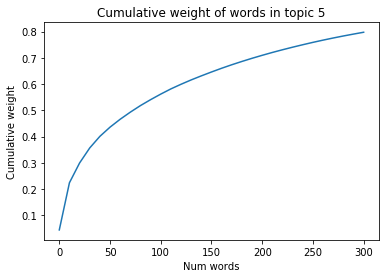

In [26]:
topic_num = 5

w_sum = 0
count = 0
idx = []
cum_weight = []
for i in LDA_90.show_topic(topic_num, topn=301):
    w_sum += i[1]
    if count%10 == 0:
        print('weighted sum after {} topic words: {}'.format(count, w_sum))
        idx.append(count)
        cum_weight.append(w_sum)
    count += 1

### plot cumulative weight of words
plt.plot(idx, cum_weight, label = 'cum_weight')
plt.title("Cumulative weight of words in topic " + str(topic_num))
plt.xlabel("Num words")
plt.ylabel("Cumulative weight")
# plt.legend(("perplex_values"), loc='best')
plt.show()

### Thoughts
- I like 90 topics more than 40
- Takes 150+ words to get to 80% of the probability distribution for a given topic
- Should we sum over all the words? a specific number (e.g. top 100 words)? until a cum_sum reached (0.5)?

## Visualization

### Load corpus and dict

In [32]:
path = '/Users/richardkuzma/coding/analysis/monster/data/cleaned/'
filename = 'monster_jobs_dict.pkl'
with open(path+filename, 'rb') as f:
    jobs_dict = pickle.load(f)

filename = 'monster_jobs_corpus.pkl'
with open(path+filename, 'rb') as f:
    jobs_corpus = pickle.load(f)


In [33]:
### pyLDAvis of the 90 topic model
vis_LDA_90 = visualize_lda(LDA_90, jobs_corpus, jobs_dict)
vis_LDA_90


148.8583278656006 seconds


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
68    -0.038728  0.157993       1        1  4.688361
87     0.168110 -0.019659       2        1  4.397275
34    -0.092093 -0.165305       3        1  3.655384
72     0.084357  0.055802       4        1  3.145788
20     0.145595  0.048635       5        1  2.857041
...         ...       ...     ...      ...       ...
10     0.070666  0.048598      86        1  0.197737
63    -0.042668 -0.010159      87        1  0.153557
4     -0.077011  0.051188      88        1  0.151606
31    -0.060469  0.056635      89        1  0.122228
77     0.056869  0.039371      90        1  0.122186

[90 rows x 5 columns], topic_info=             Term          Freq         Total Category  logprob  loglift
653         store  23249.000000  23249.000000  Default  30.0000  30.0000
26       customer  39552.000000  39552.000000  Default  29.0000  29.0000
530          sale  21263.000000  21263.000000  Default  28.0000  28.0000
91        project  23196.000000  23196.000000  Default  27.0000  27.0000
210          care  13265.000000  13265.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
66     management     45.038540  25982.066406  Topic90  -4.6445   0.3497
5445         soft     26.424948    100.735718  Topic90  -5.1777   5.3692
185       ability     32.276081  30502.732422  Topic90  -4.9777  -0.1439
26       customer     29.915918  39552.195312  Topic90  -5.0536  -0.4796
248   environment     26.506477  14883.836914  Topic90  -5.1746   0.3767

[5939 rows x 6 columns], token_table=      Topic      Freq                          Term
term                                               
6142     25  0.982660      abilities_close_distance
8221     59  0.992488  abilities_typically_acquired
185       1  0.023834                       ability
185       2  0.029047                       ability
185       3  0.136480                       ability
...     ...       ...                           ...
4549     68  0.045625                            yr
4549     83  0.009777                            yr
4549     84  0.273748                            yr
5507     49  0.947879                       yrs_exp
4963     22  0.919108                       zealand

[53348 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[69, 88, 35, 73, 21, 80, 2, 7, 51, 57, 41, 22, 3, 75, 6, 27, 50, 8, 28, 17, 58, 85, 56, 23, 44, 61, 25, 26, 83, 37, 54, 47, 16, 10, 43, 70, 60, 66, 14, 81, 65, 76, 38, 48, 77, 46, 74, 30, 49, 59, 52, 9, 79, 33, 13, 24, 62, 86, 12, 82, 72, 71, 40, 42, 34, 19, 84, 63, 67, 15, 68, 20, 89, 87, 39, 90, 4, 29, 18, 36, 1, 55, 53, 45, 31, 11, 64, 5, 32, 78])

In [34]:
### pyLDAvis of the 90 topic model
vis_LDA_40 = visualize_lda(LDA_40, jobs_corpus, jobs_dict)
vis_LDA_40


55.17512083053589 seconds


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13     0.106904 -0.097163       1        1  6.347215
23    -0.098921  0.068408       2        1  5.783016
36     0.026528 -0.161776       3        1  5.166789
15     0.020617  0.179316       4        1  4.725265
30    -0.159567 -0.033920       5        1  4.302253
37     0.051920  0.046482       6        1  4.016065
39     0.195705  0.148616       7        1  3.831608
4     -0.071782  0.076758       8        1  3.797288
34    -0.026564  0.004937       9        1  3.711710
28    -0.067809 -0.016856      10        1  3.581904
35     0.042626 -0.112023      11        1  3.321922
31     0.037868 -0.021632      12        1  3.248431
26    -0.095539 -0.160247      13        1  3.029149
18    -0.180044 -0.029107      14        1  2.998726
17    -0.187075 -0.039879      15        1  2.978047
5      0.005043  0.118872      16        1  2.944896
25    -0.078438  0.070153      17        1  2.678731
3     -0.060347  0.021612      18        1  2.644753
21     0.080105  0.099295      19        1  2.643924
1     -0.132790  0.047567      20        1  2.531351
8     -0.022950  0.120079      21        1  2.416893
29     0.040582  0.094523      22        1  2.239933
32     0.106919  0.171148      23        1  1.959256
27     0.076006 -0.036328      24        1  1.734689
6     -0.199684  0.069277      25        1  1.581735
20     0.066112  0.027796      26        1  1.581666
24     0.021315 -0.120687      27        1  1.514466
14     0.143188  0.004467      28        1  1.393423
22    -0.115826  0.032286      29        1  1.318056
0      0.166403  0.106650      30        1  1.249257
19     0.019012  0.003666      31        1  1.241809
12     0.187306 -0.235945      32        1  1.217032
38    -0.085313 -0.067333      33        1  1.147537
7     -0.101386 -0.043267      34        1  1.037416
33     0.118306 -0.066204      35        1  0.931096
11     0.078979 -0.052246      36        1  0.853185
10     0.117403 -0.052242      37        1  0.768573
9     -0.057626 -0.077729      38        1  0.647791
16     0.000589 -0.038338      39        1  0.617618
2      0.032226 -0.048986      40        1  0.265525, topic_info=            Term          Freq         Total Category  logprob  loglift
653        store  23000.000000  23000.000000  Default  30.0000  30.0000
625      manager  29465.000000  29465.000000  Default  29.0000  29.0000
91       project  23024.000000  23024.000000  Default  28.0000  28.0000
26      customer  40756.000000  40756.000000  Default  27.0000  27.0000
530         sale  21753.000000  21753.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
310      minimum     83.655174   6964.376465  Topic40  -4.8014   1.5094
618  information     86.517982  13757.456055  Topic40  -4.7678   0.8622
290        learn     77.807175   5162.456055  Topic40  -4.8739   1.7363
345  requirement     74.302780  17080.574219  Topic40  -4.9200   0.4937
7    application     72.928810   7904.345215  Topic40  -4.9387   1.2455

[3064 rows x 6 columns], token_table=      Topic      Freq                          Term
term                                               
8221      9  0.975512  abilities_typically_acquired
8221     39  0.010603  abilities_typically_acquired
185       1  0.031954                       ability
185       2  0.079055                       ability
185       3  0.025831                       ability
...     ...       ...                           ...
4209     35  0.044852             youtube_test_href
4209     39  0.950051             youtube_test_href
4922      1  0.957009                         youve
4922      7  0.015689                         youve
4922     19  0.015689                         youve

[22847 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 24, 37, 16, 31, 38, 40, 5, 35, 29, 36, 32, 

# Way Forward
- 90 topics and 100 words/topic --> d2v vectors (make it possible to change value)
- I'm thinking generate the top X topics for a document, ask user about those words...